:Credit 1: https://www.youtube.com/watch?v=6j_qhTJgB1w

Credit 2: https://github.com/mlflow/mlflow/blob/master/examples/sklearn_elasticnet_wine/train.ipynb
# What is MLflow?

MLflow is a framework that supports the machine learning lifecycle. This means that it has components to monitor your model during training and running, ability to store models, load the model in production code and create a pipeline.

ref: https://towardsdatascience.com/getting-started-with-mlflow-52eff8c09c61

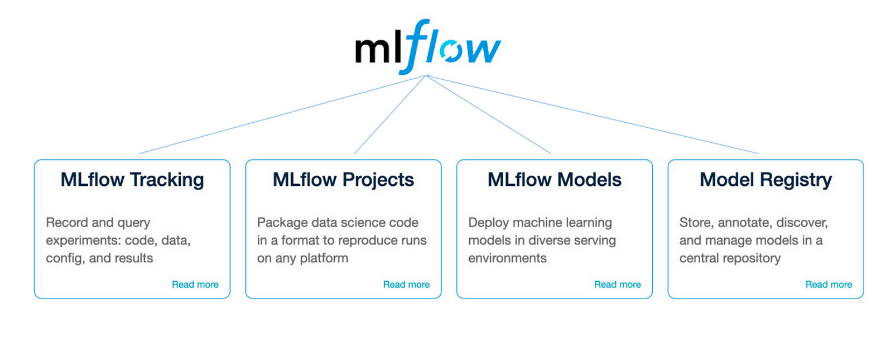

# Install mlflow

In [ ]:
!pip install mlflow --quiet --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 3.5 MB/s eta 0:00:00


# Import libraries

In [ ]:
# Importing all Libraries
import mlflow
import mlflow.sklearn
#mlflow.set_experiment('mlflow-demo')

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# Simple MLFLow Workflow for Scikit-Learn
1. Start an experiment using mlflow.start_run() which switches the context of your existing model code to enable mlflow tracking.
2. We log the run parameters with mlflow.log_param()
3. We log the model metrics (mean accuracy on the training set in this case) with mlflow.log_metric().
4. After model training and evaluation, I have logged the model using mlflow.sklearn.log_model().

In [ ]:
# Load and split dataset
X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training Data Shape: ", X_train.shape, y_train.shape)
print("Testing Data Shape: ", X_test.shape, y_test.shape)

local_registry = "sqlite:///mlruns.db"
mlflow.set_tracking_uri(local_registry)
experiment_id = mlflow.set_experiment('test_experiment')

def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    return accuracy

def train_model(criterion, max_depth):

    # Starting the Experiement
    with mlflow.start_run():

        # Model building
        model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,random_state=0)
        model.fit(X_train, y_train)   # Model Training
        y_pred = model.predict(X_test)  # Model Prediction on Testing data
        (accuracy) = eval_metrics(y_test, y_pred)

        print('Decirion tree (criterion=%s, max_depth=%d):'%(criterion, max_depth))
        print('Accuracy: {:.4f}'.format(accuracy))

        # Logging Parameters
        mlflow.log_param("criterion", criterion)
        mlflow.log_param("max_depth", max_depth)

        # Logging Metrics
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

        # Model Logging
        mlflow.sklearn.log_model(model, 'model')

        return model

Training Data Shape:  (455, 30) (455,)
Testing Data Shape:  (114, 30) (114,)


2024/01/23 07:07:55 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/01/23 07:07:55 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

# Train 10 decision trees with different criterion and max depth

In [ ]:
train_model('gini', 1)

Decirion tree (criterion=gini, max_depth=1):
Accuracy: 0.9035


DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
train_model('gini', 2)

Decirion tree (criterion=gini, max_depth=2):
Accuracy: 0.9649


DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
train_model('gini', 3)

Decirion tree (criterion=gini, max_depth=3):
Accuracy: 0.9649


DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
train_model('gini', 4)

Decirion tree (criterion=gini, max_depth=4):
Accuracy: 0.9561


DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
train_model('gini', 5)

Decirion tree (criterion=gini, max_depth=5):
Accuracy: 0.9474


DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
train_model('entropy', 1)

Decirion tree (criterion=entropy, max_depth=1):
Accuracy: 0.9035


DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [ ]:
train_model('entropy', 2)

Decirion tree (criterion=entropy, max_depth=2):
Accuracy: 0.9211


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
train_model('entropy', 3)

Decirion tree (criterion=entropy, max_depth=3):
Accuracy: 0.9474


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
train_model('entropy', 4)

Decirion tree (criterion=entropy, max_depth=4):
Accuracy: 0.9386


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
train_model('entropy', 5)

Decirion tree (criterion=entropy, max_depth=5):
Accuracy: 0.9211


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

# MLflow Models

An MLflow Model is a standard format for packaging machine learning models that can be used in a variety of downstream tools

In [ ]:
#Search best 5 runs
best_run_df = mlflow.search_runs(order_by=['metrics.accuracy DESC'], max_results=5)
best_run_df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.criterion,params.max_depth,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.source.name
0,bdf6fa43fbbc4d0e82969bdf7afb3d5b,1,FINISHED,/content/mlruns/1/bdf6fa43fbbc4d0e82969bdf7afb...,2024-01-23 07:08:08.139000+00:00,2024-01-23 07:08:15.465000+00:00,0.964912,gini,3,LOCAL,able-donkey-323,"[{""run_id"": ""bdf6fa43fbbc4d0e82969bdf7afb3d5b""...",root,/usr/local/lib/python3.10/dist-packages/colab_...
1,205ebd206d2944e7b15d3ad59f4f1a27,1,FINISHED,/content/mlruns/1/205ebd206d2944e7b15d3ad59f4f...,2024-01-23 07:08:03.527000+00:00,2024-01-23 07:08:08.089000+00:00,0.964912,gini,2,LOCAL,nosy-snail-26,"[{""run_id"": ""205ebd206d2944e7b15d3ad59f4f1a27""...",root,/usr/local/lib/python3.10/dist-packages/colab_...
2,06e0b7915ace41b6882ede3e2283a7dc,1,FINISHED,/content/mlruns/1/06e0b7915ace41b6882ede3e2283...,2024-01-23 07:08:15.538000+00:00,2024-01-23 07:08:22.112000+00:00,0.956140,gini,4,LOCAL,agreeable-newt-598,"[{""run_id"": ""06e0b7915ace41b6882ede3e2283a7dc""...",root,/usr/local/lib/python3.10/dist-packages/colab_...
3,a7da6180f3394353936dd06a3cf352ab,1,FINISHED,/content/mlruns/1/a7da6180f3394353936dd06a3cf3...,2024-01-23 07:08:33.827000+00:00,2024-01-23 07:08:36.442000+00:00,0.947368,entropy,3,LOCAL,nebulous-conch-339,"[{""run_id"": ""a7da6180f3394353936dd06a3cf352ab""...",root,/usr/local/lib/python3.10/dist-packages/colab_...
4,3993d85476f94aa0b460128b27dd0dd8,1,FINISHED,/content/mlruns/1/3993d85476f94aa0b460128b27dd...,2024-01-23 07:08:22.165000+00:00,2024-01-23 07:08:26.790000+00:00,0.947368,gini,5,LOCAL,crawling-perch-793,"[{""run_id"": ""3993d85476f94aa0b460128b27dd0dd8""...",root,/usr/local/lib/python3.10/dist-packages/colab_...


In [ ]:
run_id = str(best_run_df.loc[0, 'run_id'])
print('run_id: ', run_id)

run_id = str(best_run_df.loc[0, 'run_id'])
model_uri = f"runs:/{run_id}/model"
print('model_uri: ', model_uri)

run_id:  bdf6fa43fbbc4d0e82969bdf7afb3d5b
model_uri:  runs:/bdf6fa43fbbc4d0e82969bdf7afb3d5b/model


In [ ]:
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(model_uri=f"runs:/{run_id}/model")

# Predict on a Pandas DataFrame.
predicted = loaded_model.predict(pd.DataFrame(X_test))

print(classification_report(y_test, predicted, target_names=['Non-DD', 'DD'], digits=4))

              precision    recall  f1-score   support

      Non-DD     0.9778    0.9362    0.9565        47
          DD     0.9565    0.9851    0.9706        67

    accuracy                         0.9649       114
   macro avg     0.9671    0.9606    0.9636       114
weighted avg     0.9653    0.9649    0.9648       114



# Model Registry

The MLflow Model Registry component is a centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of an MLflow Model. It provides model lineage, model versioning, stage transitions (for example from staging to production), and annotations.

ref: https://mlflow.org/docs/latest/model-registry.html

In [ ]:
#Register best model
mlflow.register_model(model_uri=model_uri, name="breast_cancer")

Successfully registered model 'breast_cancer'.
Created version '1' of model 'breast_cancer'.


<ModelVersion: aliases=[], creation_timestamp=1705993722450, current_stage='None', description=None, last_updated_timestamp=1705993722450, name='breast_cancer', run_id='bdf6fa43fbbc4d0e82969bdf7afb3d5b', run_link=None, source='/content/mlruns/1/bdf6fa43fbbc4d0e82969bdf7afb3d5b/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=1>

# Test the model

In [ ]:
model_name = "breast_cancer"
model_version = 1

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

# Predict on a Pandas DataFrame.
predicted = loaded_model.predict(pd.DataFrame(X_test))

In [ ]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, predicted, target_names=['Non-DD', 'DD'], digits=4))

              precision    recall  f1-score   support

      Non-DD     0.9778    0.9362    0.9565        47
          DD     0.9565    0.9851    0.9706        67

    accuracy                         0.9649       114
   macro avg     0.9671    0.9606    0.9636       114
weighted avg     0.9653    0.9649    0.9648       114



# MLflow UI
After completing the model training and logging, we can track the model progress using MLFlow UI.

To enable the tracking, Navigate to the curselfrent project in Terminal and use the command below

Access this link: http://localhost:5000/

In [ ]:
!pip install pyngrok --quiet

In [ ]:
from pyngrok import ngrok
ngrok.kill()

#Setting the authtoken (optional)
#Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = '2TsHdd1tFmtp1cSZzWaNda1Kv9l_3b6htuCHs43LHyK2YQgVH' # Enter your authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print("MLflow Tracking UI: ", ngrok_tunnel.public_url)

MLflow Tracking UI:  https://a81b-35-190-133-45.ngrok-free.app


In [ ]:
!mlflow ui --backend-store-uri sqlite:///mlruns.db

[2024-01-23 07:08:54 +0000] [873] [INFO] Starting gunicorn 21.2.0
[2024-01-23 07:08:54 +0000] [873] [INFO] Listening at: http://127.0.0.1:5000 (873)
[2024-01-23 07:08:54 +0000] [873] [INFO] Using worker: sync
[2024-01-23 07:08:54 +0000] [879] [INFO] Booting worker with pid: 879
[2024-01-23 07:08:54 +0000] [880] [INFO] Booting worker with pid: 880
[2024-01-23 07:08:54 +0000] [881] [INFO] Booting worker with pid: 881
[2024-01-23 07:08:54 +0000] [882] [INFO] Booting worker with pid: 882
[2024-01-23 07:09:47 +0000] [873] [INFO] Handling signal: int

Aborted!
[2024-01-23 07:09:47 +0000] [882] [INFO] Worker exiting (pid: 882)
[2024-01-23 07:09:47 +0000] [881] [INFO] Worker exiting (pid: 881)
[2024-01-23 07:09:47 +0000] [880] [INFO] Worker exiting (pid: 880)
[2024-01-23 07:09:47 +0000] [879] [INFO] Worker exiting (pid: 879)
[2024-01-23 07:09:49 +0000] [873] [INFO] Shutting down: Master
